# I. OOP

1. (6б). Створіть клас Building, додайте три атрибути, один з яких має значення за замовчуванням та два методи на свій розсуд.

In [1]:
class Building(object):
    def __init__(self, address, rent_price, residents = 1):
        self.address = address
        self.rent_price = rent_price if rent_price > 0 else 1
        self.residents = residents if residents > 0 else 1

    def __str__(self):
        return f"""Building Properties:
                   Address: {self.address}
                   Rent price: {self.rent_price}
                   nResidents: {self.residents}"""

    def set_new_rent_price(self, new_rent_price):
        self.rent_price = new_rent_price


2. (2б). Створіть два обʼєкти цього класу, де один з обʼєктів створюється із дефолтним значенням атрибуту. На одному обʼєкті отримайте значення його атрибуту, а на іншому викличте один з його методів.

In [2]:
dormitory_room = Building("Oleksandry Ekster 14B", 1104)
aparments_troieshchyna = Building("Chervonoi Kalyny 81", 12000, 2)

print(f"Residents: {dormitory_room.residents}")
aparments_troieshchyna.set_new_rent_price(11000)
print(aparments_troieshchyna.rent_price)


Residents: 1
11000


3. (5б). Створіть клас, де атрибути мають різні рівні доступу. Спробуйте отримати їхні значення та опишіть результати.

In [3]:
class Student(object):
    def __init__(self, name, surname, age):
        self.name = name
        self._surname = surname
        self.__age = age if age >= 18 else 17

me = Student("Maksym", "Zabrodin", 19)

print(me.name) # public variable, so we can access it using [object].[attribute]
print(me._surname) # we can access this variable, although in python it is not good thing to do
print(me.__age) # we will get an error because after creating the ‘me’ object, this variable was renamed to _Student__age. so we have to access such a variable using getters/setters

Maksym
Zabrodin


AttributeError: 'Student' object has no attribute '__age'

4. (7б). Як ви розумієте термін self? Для чого використовується метод __init __?

*   `self` - аналог `this` з інших мов програмування. Використовується для звернення до об'єкта класу у самому класі. Наприклад, щоб отримати значення атрибутів класу `self.[назва_атрибуту]`
*   `__init__` - метод-конструктор. Неявно викликається при створенні екземпляру класу. Може містити у собі ініціалізацію атрибутів та якісь методи.

5. (9б). Створіть клас 3D-фігура без атрибутів, з методом get_volume для отримання об'єму фігури, що повертає 0 та __add __, який приймає self та other в якості аргументів, а повертає суму об'ємів 3d-фігур self та other.

In [4]:
class ThreeDimensionFigure(object):
    def get_volume(self):
        return 0

    def __add__(self, other):
        return self.get_volume() + other.get_volume()

6. (11б). Створіть 2 дочірніх класи від 3d-фігура: Циліндр та Куб, які мають атрибути, необхідні для розрахунку об'єму. Визначте метод get_volume в кожному з них так, щоби вони розраховували об'єм у залежності від формули для кожного типу фігури. Створіть обʼєкт класу Циліндр та обʼєкт класу Куб. Виконайте операцію суми за допомогою оператора + між ними, аби знайти сумарний об'єм.

In [5]:
from math import pi

class Cylinder(ThreeDimensionFigure):
    def __init__(self, radius, height):
        self.radius = radius
        self.height = height

    def get_volume(self):
        return pi * self.radius**2 * self.height


class Cube(ThreeDimensionFigure):
    def __init__(self, edge):
        self.edge = edge

    def get_volume(self):
        return self.edge**3

my_cylinder = Cylinder(5, 10)
my_cube = Cube(5)
print(my_cylinder + my_cube)

910.3981633974483


7. (3б). Продемонструйте різницю між isinstance та issubclass.

In [6]:
# isinstance is used to check whether the created object is an instance of a certain class
print(isinstance(my_cube, (Cube, ThreeDimensionFigure)))
print(isinstance(my_cube, Cylinder))

# issubclass is used to check whether a certain class is a subclass (child) of another class
print(issubclass(Cube, (Cube, ThreeDimensionFigure)))
print(issubclass(Cube, Cylinder))

True
False
True
False


8. (13б). Створіть клас EWallet з приватними атрибутами balance та id. Реалізуйте методи поповнення та зняття коштів, забезпечивши належну інкапсуляцію. Підказка: використовуйте декоратори property та setter.

In [7]:
class EWallet(object):
    def __init__(self, balance, id):
        self.__balance = balance if balance > 0 else 0
        self.__id = id

    @property
    def balance(self):
        return self.__balance

    @balance.setter
    def balance(self, new_balance):
        if new_balance >= 0:
            self.__balance = new_balance

    @property
    def id(self):
        return self.__id

    @id.setter
    def id(self, new_id):
        self.__id = new_id

    def withdraw_money(self, money_to_withdraw, wallet_id):
        if wallet_id == self.id:
            if 0 < money_to_withdraw < self.balance:
                self.balance -= money_to_withdraw
            else:
                print("Not enough money on your wallet")
        else:
            print("It is not correct ID")

    def deposit_money(self, money_to_deposit, wallet_id):
        if wallet_id == self.id:
            self.balance += money_to_deposit
        else:
            print("It is not correct ID")

my_wallet = EWallet(5000, 5)
my_wallet.deposit_money(2500, 5)
print(my_wallet.balance)
my_wallet.withdraw_money(4000, 5)
print(my_wallet.balance)


7500
3500


9. (11б). Створіть клас ShoppingCart, який містить список об'єктів типу Item. Реалізуйте методи для додавання айтемів, їх видалення та відображення списку айтемів.

In [ ]:
from copy import deepcopy

class Item(object):
    def __init__(self, name, price):
        self._name = name
        self._price = price if price > 0 else 1

    def __str__(self):
        return f"{self._name} with a price of: {self._price:.2f}"


class ShoppingCart(object):
    def __init__(self, items = []):
        self._items = deepcopy(items) if items else []

    def add_item(self, item):
        self._items.append(item)

    def remove_item(self, item):
        for item_in_list in self._items:
            if item_in_list._name == item._name and item_in_list._price == item._price:
                self._items.remove(item_in_list)
                break

    def __str__(self):
        if not self._items:
            return "Cart: Empty"
        else:
            items_string = "".join({str(f"{item}\n") for item in self._items})
            return f"Cart:\n{items_string}"

my_shopping_cart = ShoppingCart([Item("Laptop", 50000), Item("Phone", 19999.99), Item("Coffee", 75)])
print(my_shopping_cart)


10. (13б). Створіть клас Vehicle з атрибутами brand (manufacturer) та production_age. Створіть ще один клас Engine з такими атрибутами, як type (ex. petrol) та size (volume, litres). Створіть клас Car, який успадковує обидва класи Vehicle та Engine. Продемонструйте використання множинної спадковості, створивши обʼєкт класу Car та отримавши mro для цього класу.

In [8]:
class Vehicle(object):
    def __init__(self,  manufacturer, production_age):
        self._manufacturer = manufacturer
        self._production_age = production_age
    def __str__(self):
        return f"{self._manufacturer} with {self._production_age} year(s) of production age"


class Engine(object):
    def __init__(self, engine_type, size):
        self._engine_type = engine_type
        self._size = size

    def __str__(self):
        return f"{self._size} litres {self._engine_type} engine"

class Car(Vehicle, Engine):
    def __init__(self, manufacturer, production_age, engine_type, size):
        Vehicle.__init__(self, manufacturer, production_age)
        Engine.__init__(self, engine_type, size)

    def __str__(self):
        return f"{Vehicle.__str__(self)} with {Engine.__str__(self).lower()}"

bmw = Car("Hyundai i30", 5, "Petrol", 1.5)

print(bmw)
print(Car.mro())


Hyundai i30 with 5 year(s) of production age with 1.5 litres petrol engine
[<class '__main__.Car'>, <class '__main__.Vehicle'>, <class '__main__.Engine'>, <class 'object'>]


# II. Iterator

11. (4б). Визначте рядок(str) з 4ма різними за значенням символами. Створіть ітератор на основі цього рядка. Викличте 5 разів функцію next на ітераторі, 4ри перших з них огорніть у ф-цію print().

In [9]:
my_string = "1234"
my_string_iter = iter(my_string)

for i in range(0, 4):
    print(next(my_string_iter))
next(my_string_iter) # we will get an error because there are no elements left to iterate


1
2
3
4


StopIteration: 

А що якщо викликати цю ж функцію на рядку?

In [10]:
for i in range(0, 5): # we will get an error because string is an iterable object, not an iterator
    print(next(my_string))
next(my_string)


TypeError: 'str' object is not an iterator

 12. (5б). Опишіть своїми словами в одному реченні, як ви розумієте різницю між ітерабельними обʼєктами та ітераторами (можна на прикладі).

*   iterable objects - це об'єкти, зокрема структури даних, які вже реалізують ітератор, тому по ним можна ітеруватися за допомогою, наприклад, for-each (який неявно створює ітератор цього об'єкту) та для них можна застосувати метод `iter()`
*   iterator - це об'єкт з методами `__iter__`, що повертає себе, та `__next__`, що повертає наступний елемент, що дозволяють ітеруватися по об'єкту.

13. (11б). Створіть клас, що має визначений Iterator Protocol та при кожному виклику next повертає назву дня тижня, поки вони не вичерпаються. Зверніть увагу, що порядок має значення.

In [11]:
class Week:
    def __init__(self):
        self.days = [
            "Monday",
            "Tuesday",
            "Wednesday",
            "Thursday",
            "Friday",
            "Saturday",
            "Sunday"
            ]

    def __iter__(self):
        self.current = 0
        return self

    def __next__(self):
        if self.current < 7:
            day = self.days[self.current]
            self.current += 1
            return day
        else:
            raise StopIteration

week = Week()
for day in week:
    print(day)


Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday


# Вітаю! Ви велика(ий) молодець, що впоралась(вся). Похваліть себе та побалуйте чимось приємним. Я Вами пишаюся.

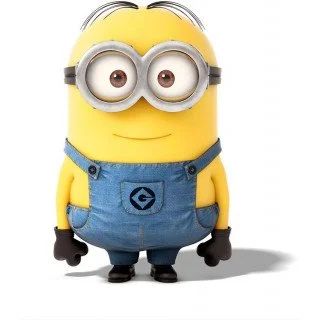